In [ ]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


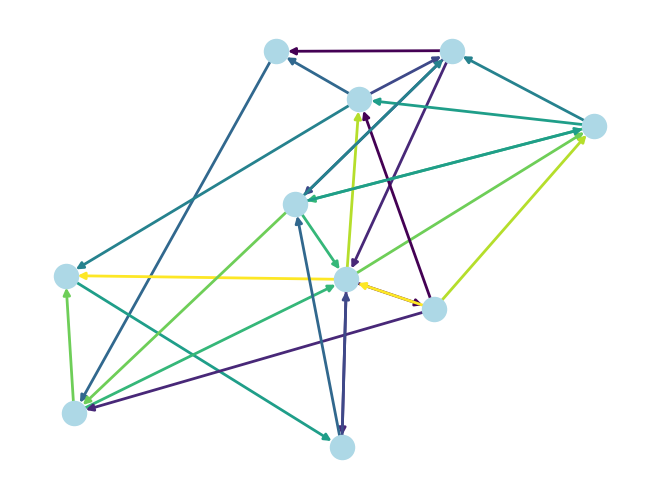

The quickest path is: [0, 9] with a traversal time of 15.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the number of nodes, density, and amount of items to be transmitted
num_nodes = 10
density = 0.3
items_to_transmit = 10

# Generate random traversal times and capacities for the edges
traversal_times = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
capacities = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Create a directed graph
G = nx.gnp_random_graph(num_nodes, density, directed=True)

# Set edge capacities and traversal times
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['capacity'] = capacities[i % len(capacities)]
    G[u][v]['traversal_time'] = traversal_times[i % len(traversal_times)]

# Set node positions for visualization
pos = nx.spring_layout(G)

# Set the edge colors based on their traversal time
edge_colors = [G[u][v]['traversal_time'] for u, v in G.edges()]

# Draw the graph with edge colors based on their traversal time
nx.draw(G, pos=pos, node_color='lightblue', edge_color=edge_colors, width=2, cmap='cool')
plt.show()

# Find the quickest path using the Dijkstra algorithm
path = nx.dijkstra_path(G, source=0, target=num_nodes-1, weight='traversal_time')

# Print the quickest path and its traversal time
print(f'The quickest path is: {path} with a traversal time of {nx.dijkstra_path_length(G, source=0, target=num_nodes-1, weight="traversal_time")}.')


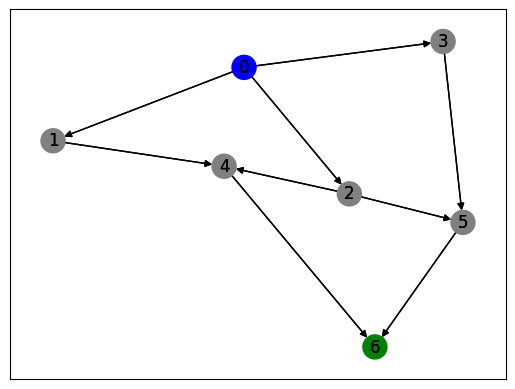

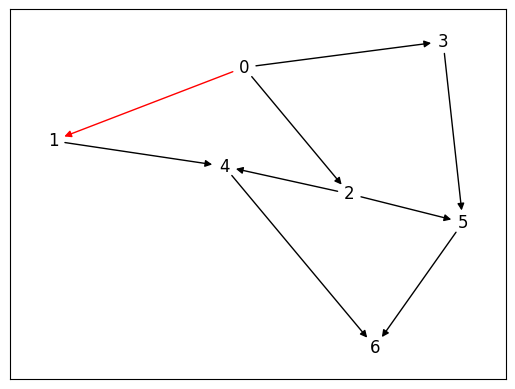

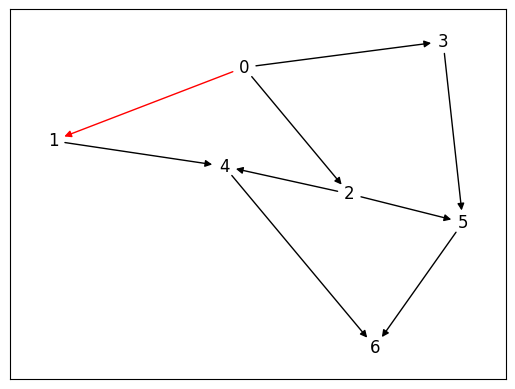

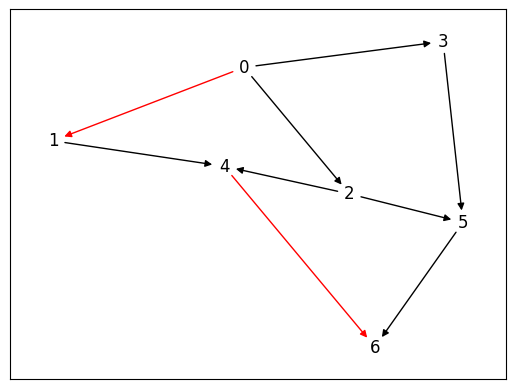

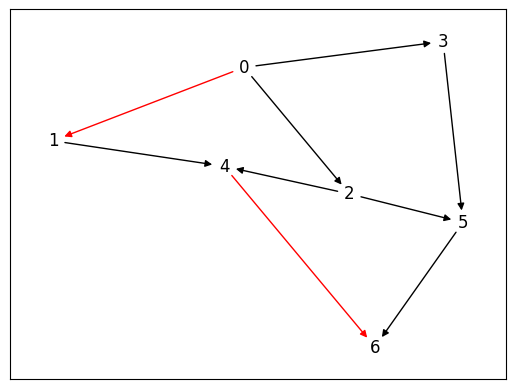

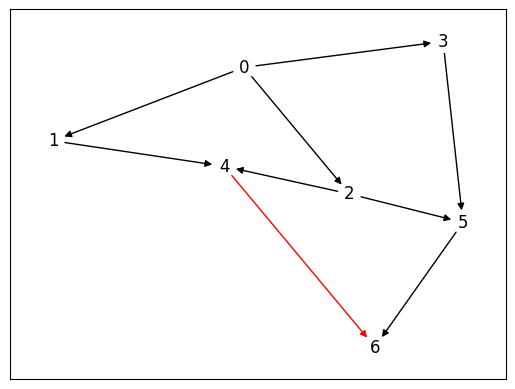

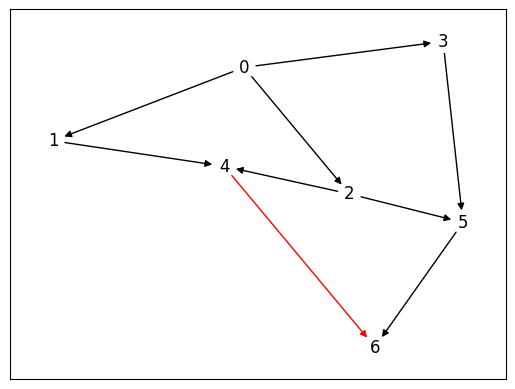

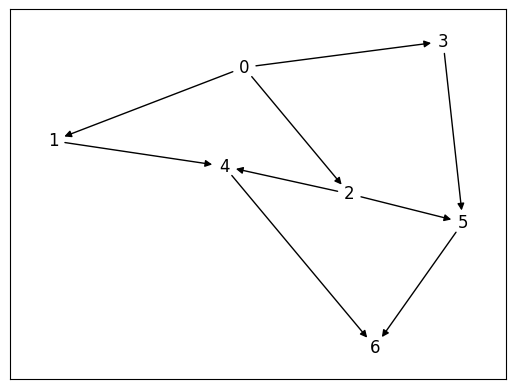

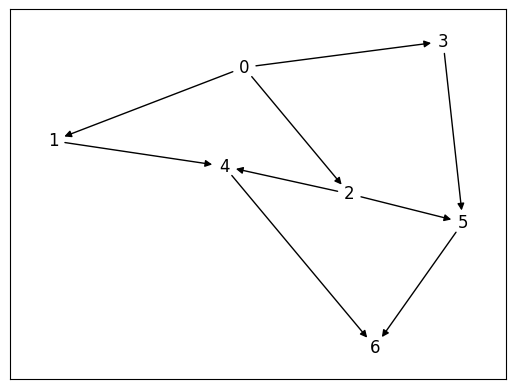

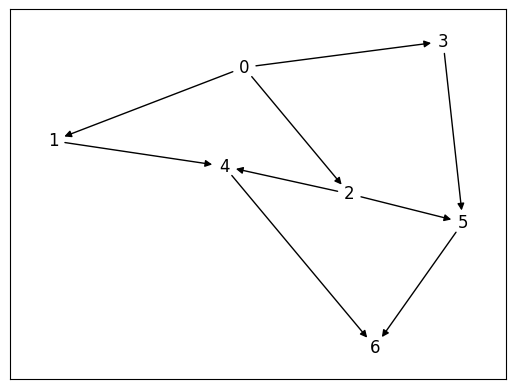

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time

# Turn on interactive mode
plt.ion()

# Define the graph
G = nx.DiGraph()
G.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 4), (2, 4), (2, 5), (3, 5), (4, 6), (5, 6)])
nx.set_edge_attributes(G, {(0, 1): {'capacity': 3, 'traversal_time': 1},
                           (0, 2): {'capacity': 2, 'traversal_time': 2},
                           (0, 3): {'capacity': 1, 'traversal_time': 3},
                           (1, 4): {'capacity': 2, 'traversal_time': 2},
                           (2, 4): {'capacity': 1, 'traversal_time': 1},
                           (2, 5): {'capacity': 3, 'traversal_time': 2},
                           (3, 5): {'capacity': 2, 'traversal_time': 1},
                           (4, 6): {'capacity': 3, 'traversal_time': 2},
                           (5, 6): {'capacity': 2, 'traversal_time': 1}})

# Set the source and destination nodes
source = 0
destination = 6

# Initialize the packet queue
packets = [{'id': i, 'source': source, 'destination': destination, 'path': []} for i in range(3)]

# Draw the graph
pos = nx.spring_layout(G)
node_colors = ['blue' if n == source else 'green' if n == destination else 'gray' for n in G.nodes()]
nodes = nx.draw_networkx_nodes(G, pos=pos, node_color=node_colors)
labels = nx.draw_networkx_labels(G, pos=pos)
edges = nx.draw_networkx_edges(G, pos=pos)

# Animate packet movement through the graph
for i in range(10):
    # Update the packet queue
    for packet in packets:
        if packet['path']:
            next_node = packet['path'][0]
            G[packet['current_node']][next_node]['capacity'] -= 1
            packet['current_node'] = next_node
            packet['path'].pop(0)
        else:
            path = nx.shortest_path(G, packet['source'], packet['destination'], weight='traversal_time')
            packet['current_node'] = path[0]
            packet['path'] = path[1:]

    # Update the graph visualization
    edge_colors = ['red' if G[u][v]['capacity'] == 0 else 'black' for u, v in G.edges()]
    nodes.set_color(node_colors)
    nx.draw_networkx_labels(G, pos=pos)
    edges = nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors)
    plt.draw()
    plt.pause(0.5)
    time.sleep(0.5)


Quickest path: ['A', 'C', 'E', 'F']
Transmission time: 6.166666666666667


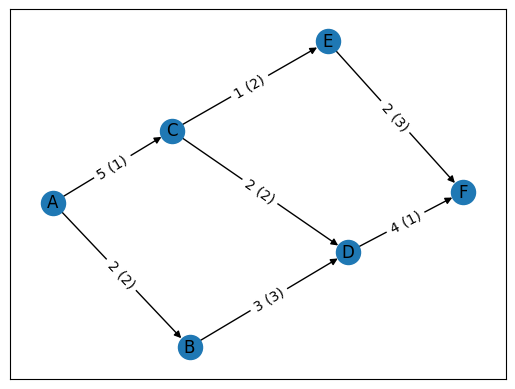

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def quickest_path(G, source, target, weight='weight'):
    # Find the quickest path in G from source to target using Dijkstra's algorithm
    path = nx.dijkstra_path(G, source, target, weight=weight)
    # Compute the time to transmit the given amount of items along the path
    time = sum(G[u][v][weight] / G[u][v].get('capacity', 1.0) for u, v in zip(path, path[1:]))
    return path, time

# Define a network with edge weights and capacities
G = nx.DiGraph()
G.add_edges_from([
    ('A', 'B', {'weight': 2, 'capacity': 2}),
    ('A', 'C', {'weight': 5, 'capacity': 1}),
    ('B', 'D', {'weight': 3, 'capacity': 3}),
    ('C', 'D', {'weight': 2, 'capacity': 2}),
    ('C', 'E', {'weight': 1, 'capacity': 2}),
    ('D', 'F', {'weight': 4, 'capacity': 1}),
    ('E', 'F', {'weight': 2, 'capacity': 3}),
])

# Compute the quickest path from 'A' to 'F'
path, time = quickest_path(G, 'A', 'F')
print("Quickest path:", path)
print("Transmission time:", time)

# Plot the network with edge labels
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = {(u, v): f"{d['weight']} ({d.get('capacity', 1)})" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the graph
G = nx.DiGraph()
G.add_edges_from([('A', 'B', {'weight': 3, 'capacity': 2}),
                  ('A', 'C', {'weight': 6, 'capacity': 1}),
                  ('B', 'C', {'weight': 2, 'capacity': 2}),
                  ('B', 'D', {'weight': 1, 'capacity': 1}),
                  ('C', 'D', {'weight': 1, 'capacity': 3}),
                  ('C', 'E', {'weight': 5, 'capacity': 2}),
                  ('D', 'E', {'weight': 4, 'capacity': 3}),
                  ('D', 'F', {'weight': 4, 'capacity': 2}),
                  ('E', 'F', {'weight': 2, 'capacity': 3}),
                  ('E', 'G', {'weight': 1, 'capacity': 1}),
                  ('F', 'G', {'weight': 2, 'capacity': 2})])

# Define the nodes and packets
nodes = {'A': (1, 0), 'B': (2, 0), 'C': (3, 1), 'D': (4, 0), 'E': (5, 1), 'F': (6, 0), 'G': (7, 0)}
packets = [{'start': 'A', 'end': 'G', 'amount': 2},
           {'start': 'C', 'end': 'G', 'amount': 1},
           {'start': 'B', 'end': 'F', 'amount': 3},
           {'start': 'D', 'end': 'G', 'amount': 2}]

# Define the color map for the nodes and edges
node_color_map = {'A': 'red', 'B': 'orange', 'C': 'yellow', 'D': 'green', 'E': 'blue', 'F': 'indigo', 'G': 'violet'}
edge_color_map = {}

# Define the animation function
def animate(i):
    # Clear the plot
    plt.clf()

    # Define the positions of the nodes
    pos = {node: (x + i, y) for node, (x, y) in nodes.items()}

    # Draw the graph
    nx.draw(G, pos, node_color=[node_color_map[node] for node in G.nodes()],
            edge_color=[edge_color_map.get((u, v), 'black') for u, v in G.edges()])

    # Draw the packets
    for packet in packets:
        # Calculate the fraction of the path completed
        start_pos = pos[packet['start']]
        end_pos = pos[packet['end']]
        path_length = G[packet['start']][packet['end']]['weight']
        progress = min(1, i / (path_length * 10))

        # Calculate the current position of the packet
        curr_pos = (start_pos[0] * (1 - progress) + end_pos[0] * progress,
                    start_pos[1] * (1 - progress) + end_pos[1] * progress)

        # Draw the packet
        circle = plt.Circle(curr_pos, 0.2, color=node_color_map[packet['start']])
        plt.gca().add_patch(circle)

    # Set the axis limits
    plt


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph
G = nx.DiGraph()

# Add nodes
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")

# Add edges with traversal times and capacities
G.add_edge("A", "B", time=5, capacity=100)
G.add_edge("A", "C", time=2, capacity=50)
G.add_edge("B", "C", time=2, capacity=50)
G.add_edge("B", "D", time=3, capacity=100)
G.add_edge("C", "D", time=4, capacity=100)

# Define origin and destination nodes
origin = "A"
destination = "D"

# Define the amount of items to be transmitted
items = 75

# Compute the shortest path with minimal transmission time
path = []
current_node = origin
while current_node != destination:
    path.append(current_node)
    next_node = None
    min_time = float("inf")
    for successor in G.successors(current_node):
        if items <= G[current_node][successor]["capacity"]:
            # Check if the key exists in the dictionary before accessing it
            if "time" in G[current_node][successor]:
                time = G[current_node][successor]["time"]
            else:
                raise ValueError("Traversal time not defined for edge: " + current_node + " -> " + successor)
            if time < min_time:
                min_time = time
                next_node = successor
    if next_node is None:
        raise ValueError("No feasible path found from " + current_node + " to " + destination)
    current_node = next_node
path.append(destination)

# Print the shortest path
print("Shortest path:", path)

# Visualize the graph and the shortest path
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
plt.axis('off')
plt.show()


Shortest path: ['A', 'B', 'D']


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the graph
G = nx.DiGraph()

# Add nodes
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")

# Add edges with traversal times and capacities
G.add_edge("A", "B", time=5, capacity=100)
G.add_edge("A", "C", time=2, capacity=50)
G.add_edge("B", "C", time=2, capacity=50)
G.add_edge("B", "D", time=3, capacity=100)
G.add_edge("C", "D", time=4, capacity=100)

# Define origin and destination nodes
origin = "A"
destination = "D"

# Define the amount of items to be transmitted
items = 75

# Compute the shortest path with minimal transmission time
path = []
current_node = origin
while current_node != destination:
    path.append(current_node)
    next_node = None
    min_time = float("inf")
    for successor in G.successors(current_node):
        if items <= G[current_node][successor]["capacity"]:
            if "time" in G[current_node][successor]:
                time = G[current_node][successor]["time"]
            else:
                raise ValueError("Traversal time not defined for edge: " + current_node + " -> " + successor)
            if time < min_time:
                min_time = time
                next_node = successor
    if next_node is None:
        raise ValueError("No feasible path found from " + current_node + " to " + destination)
    current_node = next_node
path.append(destination)

# Print the shortest path
print("Shortest path:", path)

# Define node positions for plotting
pos = {"A": (0, 1), "B": (1, 2), "C": (2, 1), "D": (3, 2)}

# Define edge colors and capacities for plotting
edge_colors = {edge: "black" for edge in G.edges()}
edge_capacities = {(edge[0], edge[1]): str(G[edge[0]][edge[1]]["capacity"]) for edge in G.edges()}

# Define figure and axis for plotting
fig, ax = plt.subplots()

# Define function to update the animation at each frame
def update(frame):
    # Highlight current node
    current_node = path[frame]
    node_colors = ["red" if node == current_node else "gray" for node in G.nodes()]

    # Highlight current edge
    if frame > 0:
        prev_node = path[frame-1]
        edge_colors[(prev_node, current_node)] = "red"

    # Update plot
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color=node_colors, node_size=500)
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color=edge_colors.values(), width=2)
    nx.draw_networkx_labels(G, pos, ax=ax)
    nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=edge_capacities)

    # Reset edge colors for next frame
    if frame > 0:
        edge_colors[(prev_node, current_node)] = "black"

# Define animation with FuncAnimation
ani = animation.FuncAnimation(fig, update, frames=len(path), interval=1000, repeat=True)

# Show the animation
plt.show()


Shortest path: ['A', 'B', 'D']


<IPython.core.display.Javascript object>